In [53]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

In [54]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from matplotlib import pyplot as plt
import numpy as np
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

def circ(N):
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q,c)

    return qc,q,c



In [55]:
qc,q,c = circ(3)


In [56]:
qc.x(q[0])
qc.h(q[0])
qc.cx(q[0],q[1])
qc.ccx(q[0],q[1],q[2])

In [57]:
#qc.measure(q,c)

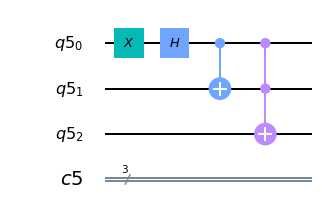

In [58]:
qc.draw()

In [59]:
IBMQ.backends()
d = Aer.get_backend('qasm_simulator')
j = execute(qc,d,shots = 1024)
print(j.result().get_counts(qc))

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
No measurements in circuit "circuit18": count data will return all zeros.


{'000': 1024}


In [60]:
IBMQ.backends()
d = Aer.backends('statevector_simulator')[0]
j = execute(qc,d,shots = 1024)


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [61]:
result = j.result()
result.get_statevector()

array([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j])

In [62]:
qc.measure(q,c)
IBMQ.backends()
d = Aer.get_backend('qasm_simulator')
j = execute(qc,d,shots = 1024)
print(j.result().get_counts(qc))

{'000': 531, '111': 493}


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [82]:
qc,q,c = circ(3)

In [101]:
qc,q,c = circ(3)
qc.x(q[2])
qc.barrier(q)
qc.h(q)
#oracle
qc.barrier(q)
qc.cx(q[0],q[1])
qc.ccx(q[0],q[1],q[2])
qc.cx(q[0],q[1])
qc.barrier(q)
#oracle
qc.h(q[0])
qc.h(q[1])
qc.x(q[1])
qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.barrier(q)
qc.x(q[1])
qc.barrier(q)
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

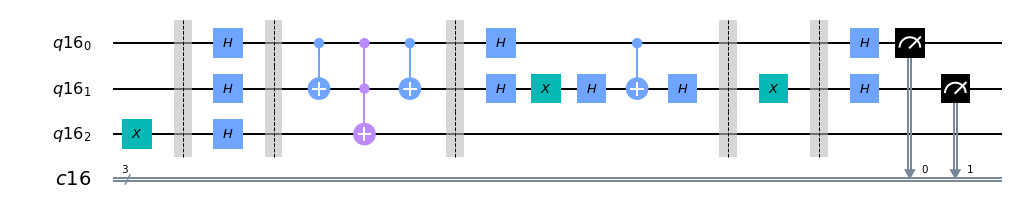

In [102]:
qc.draw()

In [103]:
IBMQ.backends()
d = Aer.get_backend('qasm_simulator')
j = execute(qc,d,shots = 1024)
print(j.result().get_counts(qc))

{'011': 1024}


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
